### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import seaborn as sns
import pingouin as pg
os.chdir('..')
import sparklyRGT as rgt 
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)
%load_ext autoreload
%autoreload 2

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
os.getcwd()

'C:\\Users\\brett\\sparklyRGT\\sparklyRGT_tutorial'

***

# 1) Load data into Python



In [30]:
os.chdir('..\\data')
file_names = ['CH01_raw_baseline_S39-42.xlsx','CH02_raw_baseline_S43-46.xlsx','NA01_raw_baseline_S37-41.xlsx',
              'BH09_raw_baseline_S32-36.xlsx'] 

df = rgt.load_multiple_data(file_names, reset_sessions = True)

df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_ClassicA,04/23/19,16:59:49,109,0.0,1,0.0,NaN,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1,rGT_ClassicA,04/23/19,16:59:49,109,0.0,1,0.0,NaN,1,2.0,...,0,0,0,0,0,0,0,0,0,0
2,rGT_ClassicA,04/23/19,16:59:49,109,0.0,1,0.0,NaN,1,3.0,...,0,0,0,0,0,0,0,0,0,0
3,rGT_ClassicA,04/23/19,16:59:49,109,0.0,1,0.0,NaN,1,4.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_ClassicA,04/23/19,16:59:49,109,0.0,1,0.0,NaN,1,5.1,...,0,0,0,1,4,0,0,0,0,0


In [28]:
#make a copy in case I fuck up
df2 = df.copy(deep = True)

***
# 2A) Baseline & Acquisition Analysis


In [36]:
#create lists of subjects by task

#fix the task names
df3 = df.replace(to_replace = {'MSN':
                         {'LossrGT_A-losscue_v1': 'outcomeRGT_A',
                        'LossrGT_B-losscue_v1': 'outcomeRGT_B',
                         'AnarchyrGT_A-losscue_v6':'RandomRGT_A',
                        'AnarchyrGT_B-losscue_v6': 'RandomRGT_B',
                         'MisrGT_A-cue':'RevRGT_A',
                         'MisrGT_B-cue':'RevRGT_B',
                         'RevRGT_A-cue':'RevRGT_A',
                         'RevRGT_B-cue':'RevRGT_B',
                         'LossRGT_A':'lossRGT_A'
                        }})
  
#make lists that are grouped by task names    
task_list = df3.groupby(['MSN'])['Subject'].unique()      
task_list



In [43]:
#concatenate together the diff versions
uncued = np.concatenate(task_list[[task for task in df3.MSN.unique() if 'Classic' in task]]) 
loss = np.concatenate(task_list[[task for task in df3.MSN.unique() if 'loss' in task]])
random = np.concatenate(task_list[[task for task in df3.MSN.unique() if 'Random' in task]])
cued = np.concatenate(task_list[[task for task in df3.MSN.unique() if 'cue' in task]])
reverse = np.concatenate(task_list[[task for task in df3.MSN.unique() if 'Rev' in task]])
outcome = np.concatenate(task_list[[task for task in df3.MSN.unique() if 'outcome' in task]])


28

In [64]:

group_names = {0: 'Uncued',
              1: 'Win cued',
              2: 'Reverse win cued',
              3: 'Outcome cued',
              4: 'Random cued',
              5: 'Loss cued'} 

group_list = [uncued,cued,reverse,outcome,random,loss]

title = 'Cue manipulation' #for plotting

startsess = 2 #first session you would like to include in figures
endsess = 4 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [6]:
rgt.check_sessions(df)

Subject  StartDate            Session
101      04/23/19             1           53.0
         04/24/19             2           80.1
         04/25/19             3          107.0
         04/26/19             4           91.0
102      04/23/19             1           83.1
         04/24/19             2           86.0
         04/25/19             3           79.0
         04/26/19             4           85.1
103      04/23/19             1          117.1
         04/24/19             2          125.0
         04/25/19             3          121.1
         04/26/19             4          114.1
104      04/23/19             1          154.1
         04/24/19             2          176.1
         04/25/19             3          178.0
         04/26/19             4          175.0
105      04/23/19             1           82.1
         04/24/19             2          113.0
         04/25/19             3          114.1
         04/26/19             4          124.0
106      04/23/19     

### Drop/edit session numbers

In [ ]:
df2 = rgt.drop_sessions(df, [])

### Check that you dropped/edited the desired session(s)

In [ ]:
rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat


In [56]:
df_sum = rgt.get_summary_data(df3) #change to df instead of df2 if you didn't do any session editing
#df_sum 

In [ ]:
df_long = rgt.get_long_summary_data(df, df_sum)
df_long.head()

In [ ]:
df_long = rgt.get_risk_status_long(df_long)
df_long = rgt.get_group_long(df_long, group_list)

### Get the risk status of the rats


In [ ]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

### Export your data to an Excel file 


In [ ]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Run Anova on selected variables

In [ ]:
rgt.rm_anova(df_long)

In [ ]:
rgt.mixed_anova(df_long, "group")

## Calculate means and SEMs for your experimental groups



In [59]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,trial1,trial2,trial3,trial4,trial5,prem1,prem2,prem3,prem4,prem5
Uncued,14.0778,67.8801,7.47299,10.5691,13.0266,68.5876,7.52798,10.8578,13.3316,66.7998,...,99.4,109.116,109.284,106.366,94.2875,29.3137,22.4511,23.7112,22.8143,25.6454
Win cued,4.96942,51.4505,21.2793,22.3008,4.6751,52.81,20.0057,22.5093,4.17293,54.2612,...,82.5719,96.0656,93.1875,95.4281,98.2625,32.904,24.6056,26.1076,23.7269,22.855
Reverse win cued,6.92553,60.92,24.5665,7.58797,4.34667,61.5432,26.389,7.72103,4.42948,64.047,...,94.5857,96.5643,97.9071,99.8,97.3417,21.3864,20.993,17.5651,15.5794,13.3157
Outcome cued,3.87973,54.3187,32.0032,9.79843,3.92777,50.0917,37.6652,8.31536,5.36161,49.1342,...,79.25,82.8857,85.5071,83.7857,98.8417,30.1295,29.7907,25.6161,27.3541,18.3804
Random cued,12.22,72.1069,10.7027,4.97045,9.75863,72.7113,13.7764,3.75373,9.96958,71.5852,...,97.3071,104.886,110.943,104.311,103.975,25.2244,20.8029,15.4868,16.0887,14.8023
Loss cued,8.50266,82.6156,5.52967,3.35211,9.76186,81.7235,5.41902,3.09562,8.92592,82.0392,...,116.614,120.3,120.079,117.65,116.868,12.2431,12.5764,6.66598,5.99226,6.83212


### Calculate means and SEMS for your experimental groups, split by risk status and/or sex

In [ ]:
control_risky = [subject for subject in control_group if subject in risky]
exp_risky = [subject for subject in exp_group if subject in risky]

control_optimal = [subject for subject in control_group if subject in optimal]
exp_optimal = [subject for subject in exp_group if subject in optimal]


group_list_risk = [control_risky,exp_risky, control_optimal, exp_optimal]

#make sure the group names are in the same order as the group list!
group_names_risk = {0:'Control risky', 
                    1: 'Experimental risky',
                    2: 'Control optimal',
                    3: 'Experimental optimal'}

mean_scores_risk, SEM_risk = rgt.get_means_sem(df_sum, group_list_risk, group_names_risk)

mean_scores_risk

# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


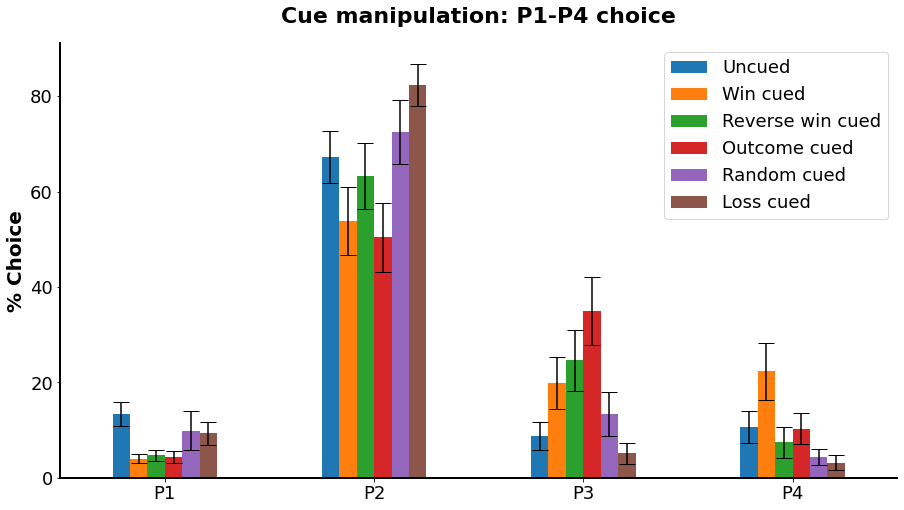

In [74]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)
plt.title('Cue manipulation: P1-P4 choice', fontweight = 'bold', fontsize = 22, pad = 20 )
#To save figure:
plt.savefig('Cue manipulation baseline p1-p4',facecolor = 'white')

## Line plot of other variables


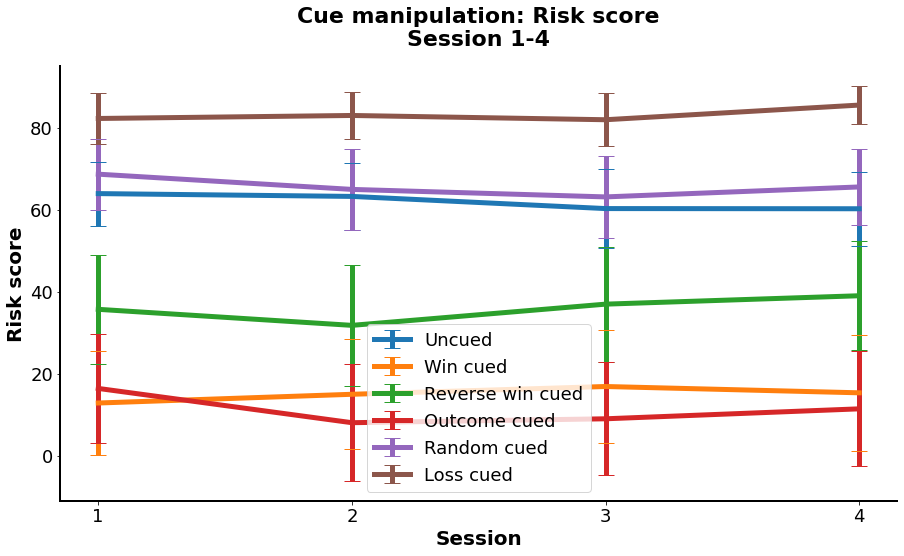

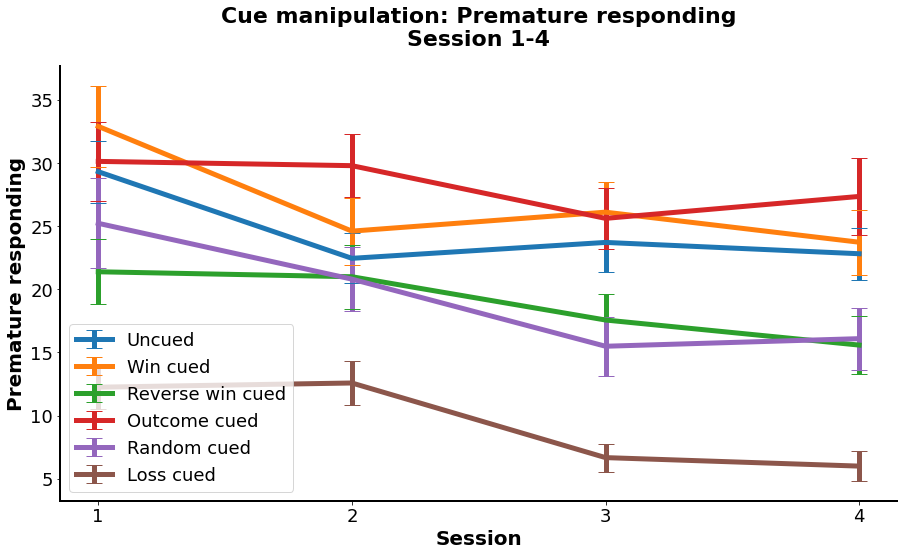

In [61]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



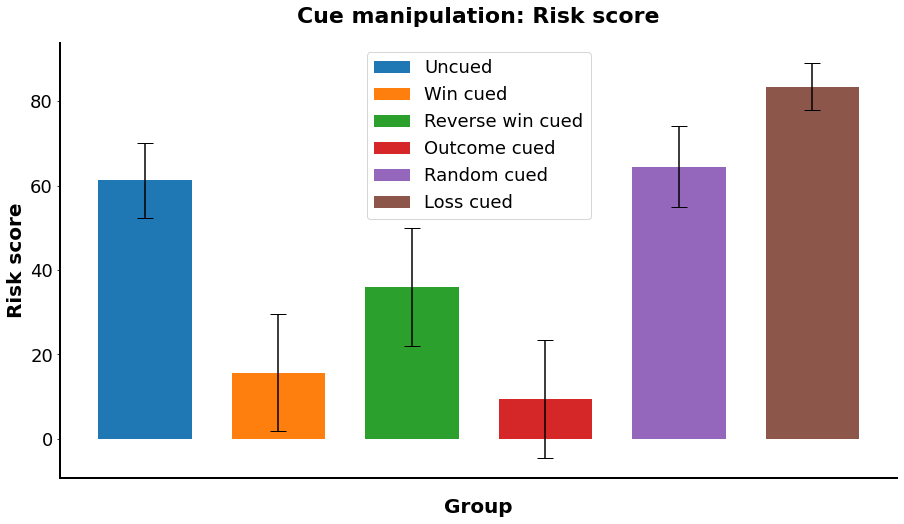

In [75]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')
plt.title('Cue manipulation: Risk score', fontweight = 'bold', fontsize = 22, pad = 20 )
plt.savefig('Cue manipulation baseline risk',facecolor = 'white')

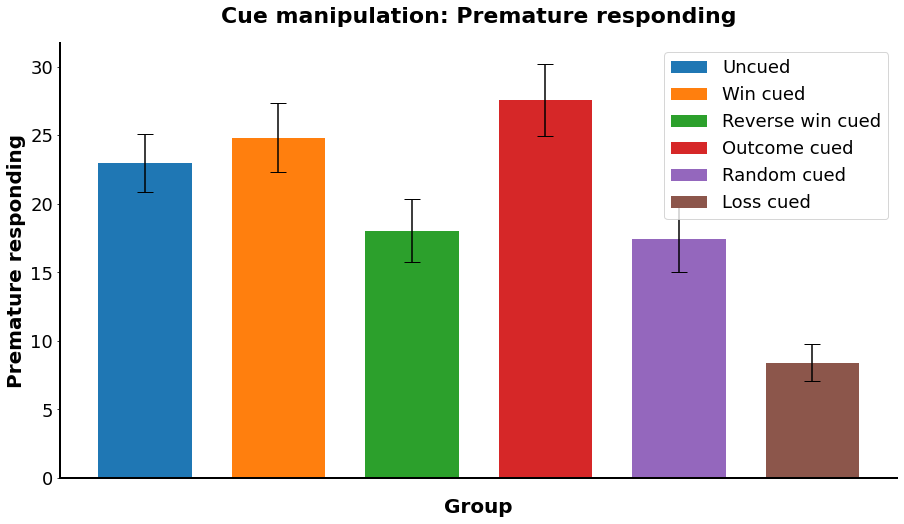

In [76]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Premature responding')
plt.title('Cue manipulation: Premature responding', fontweight = 'bold', fontsize = 22, pad = 20 )
plt.savefig('Cue manipulation baseline premature',facecolor = 'white')

## Plotting by risk status 

In [ ]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk, SEM_risk)

In [ ]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk, y_label = 'Risk score') 

In [ ]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')